<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/8D8uDf).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [2]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', index_col='id')

Посмотрим не первые 5 записей.

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше.**

**<font color='red'>Варианты:</font>**
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин

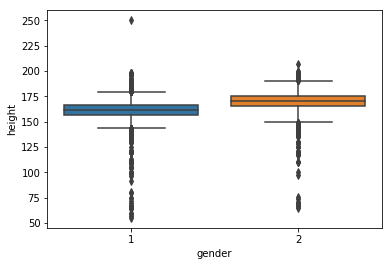

In [4]:
# Ваш код здесь

sns.boxplot(x='gender', y='height', data=df)

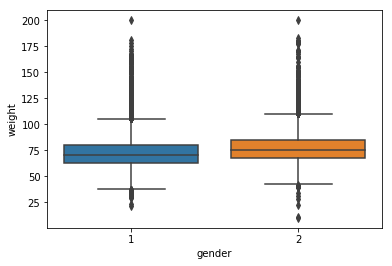

In [5]:
sns.boxplot(x='gender', y='weight', data=df)

In [6]:
df.groupby('gender').size().to_frame('gender')

,gender
gender,
1,45530
2,24470


# Ответ:
# 2 - мужчины
# 45530 женщин и 24470 мужчин

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем чаще указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- женщины
- мужчины

In [13]:
# Ваш код здесь

smoking_pcnt = df.groupby('gender').smoke.mean().to_frame('smoke') * 100
smoking_pcnt

,smoke
gender,
1,1.785636
2,21.888026


# Ответ: мужчины чаще

**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [15]:
smoking_pcnt.max() / smoking_pcnt.min()

smoke    12.257833
dtype: float64

# Ответ: 12

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чем здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 5
- 10
- 15
- 20

In [23]:
df['age_years'] = df['age'] // 365
df['age_months'] = df['age'] // 30

In [24]:
df.groupby('smoke').agg({'age_months': 'median'})

,age_months
smoke,
0,657
1,637


# Ответ: на 20

**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='../../img/SCORE2007.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 65 лет. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180). 

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Посчитайте признак ``age_years`` – возраст в годах, округлив до целых. Для данного примера отберите людей от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.

Во сколько раз (округленно) отличаются доли больных в двух сегментах, описанных выше? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [42]:
df.cholesterol.unique()

array([1, 3, 2])

In [41]:
# Ваш код здесь
# old_smoking_mens
df['age_years'] = pd.np.round(df['age'] / 365)

osm = df[(df.gender == 2) & (df.smoke == 1) &
                      (df.age_years >= 60) &(df.age_years <= 64)]

segment_1 = osm[(osm.cholesterol == 1) & (osm.ap_hi < 120)]
segment_2 = osm[(osm.cholesterol == 3) & (osm.ap_hi >= 160) & (osm.ap_hi < 180)]

s1_share = segment_1.cardio.mean()
s2_share = segment_2.cardio.mean()

s1_share, s2_share, s2_share / s1_share

(0.25641025641025639, 0.86363636363636365, 3.3681818181818186)

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке лежит в пределах нормы
- У женщин в среднем BMI выше, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

In [26]:
df['bmi'] = df['weight'] / pd.np.square(df['height'] / 100)

In [27]:
df.bmi.median()

26.374068120774975

## 1) Нет, не в пределах нормы

In [28]:
df.groupby('gender').bmi.mean().to_frame('bmi')

,bmi
gender,
1,27.987583
2,26.754442


## 2) Да, у женщин в среднем выше

In [30]:
df.groupby('cardio').bmi.mean().to_frame('bmi')

,bmi
cardio,
0,26.548175
1,28.566061


## 3) Нет, У здоровых в среднем не выше

In [34]:
df[(df.cardio == 0) & (df.alco == 0)].groupby('gender').bmi.mean().to_frame('bmi')

,bmi
gender,
1,26.845407
2,25.872638


## 4) Да, В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления выше верхнего. 
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [43]:
# Ваш код здесь
h_l, h_r = df.height.quantile(0.025), df.height.quantile(0.975)
w_l, w_r = df.weight.quantile(0.025), df.weight.quantile(0.975)

df_ap_filter = df.ap_lo <= df.ap_hi
df_h_filter = df.height.map(lambda x: h_l <= x <= h_r)
df_w_filter = df.weight.map(lambda x: w_l <= x <= w_r)

filtered_df = df[df_ap_filter & df_h_filter & df_w_filter]

len(df), len(filtered_df), (len(df) - len(filtered_df)) / len(df) * 100

(70000, 63259, 9.629999999999999)